In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
import seaborn as sns
from sklearn import preprocessing
import missingno as msno

In [2]:
df_18 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\True-18-19.csv')
df_19 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\Merged-Filtered-19-20.csv')
df_20 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\True-20-21.csv')

In [3]:
df = pd.concat([df_18, df_20, df_19], axis=0)
df

Name   Age Barangay  \
0                 Bancayrin, Justin   NaN      NaN   
1                Balbin, Raven John   NaN      NaN   
2            Bagamasbad, Abdul Aziz   NaN      NaN   
3                   Arambala, Raven   NaN      NaN   
4             Adona, Mark Ezekiel E   NaN      NaN   
..                              ...   ...      ...   
207  Natividad, Julia Louis Madamba   NaN      NaN   
208              Mendong, Roldan D.  18.0      NaN   
209   Beligolo, Fresalia Nica Dairo  18.0      NaN   
210               Galcing, Lance R.  18.0      NaN   
211           Galve, Gladys Jean A.  18.0      NaN   

                              School Strand  \
0                                NaN    NaN   
1                                NaN    NaN   
2                                NaN    NaN   
3                                NaN    NaN   
4                                NaN    NaN   
..                               ...    ...   
207                             ICAS   STEM   
208     Gutalac National High School   STEM   
209        University of San Agustin   STEM   
210  Zamboanga Chong Hua High School   STEM   
211   Ateneo De Zamboanga University   STEM   

     21st Century Literature from the Philippines and the World  \
0                                                  NaN            
1                                                  NaN            
2                                                 89.0            
3                                                 92.0            
4                                                 93.0            
..                                                 ...            
207                                               94.0            
208                                                NaN            
209                                                NaN            
210                                               88.0            
211                                                NaN            

     Advanced Statistics  Applied Economics  Basic Calculus  Biochemistry  \
0                    NaN                NaN             NaN           NaN   
1                    NaN               84.0             NaN           NaN   
2                    NaN                NaN             NaN           NaN   
3                    NaN                NaN             NaN           NaN   
4                    NaN                NaN             NaN           NaN   
..                   ...                ...             ...           ...   
207                  NaN                NaN             NaN           NaN   
208                  NaN                NaN             NaN           NaN   
209                  NaN                NaN            96.0           NaN   
210                  NaN                NaN            92.0           NaN   
211                  NaN                NaN             NaN           NaN   

     ...  Aquaculture 1  Aquaculture 2  Aquaculture 3  Aquaculture 4  HUMSS 1  \
0    ...            NaN            NaN            NaN            NaN      NaN   
1    ...            NaN            NaN            NaN            NaN      NaN   
2    ...            NaN            NaN            NaN            NaN      NaN   
3    ...            NaN            NaN            NaN            NaN      NaN   
4    ...            NaN            NaN            NaN            NaN      NaN   
..   ...            ...            ...            ...            ...      ...   
207  ...            NaN            NaN            NaN            NaN      NaN   
208  ...            NaN            NaN            NaN            NaN      NaN   
209  ...            NaN            NaN            NaN            NaN      NaN   
210  ...            NaN            NaN            NaN            NaN      NaN   
211  ...            NaN            NaN            NaN            NaN      NaN   

     HUMSS 2  Wellness and Massage 1  Wellness and Massage 1.1  \
0        NaN                     NaN            

In [4]:
df = df.drop(columns=['Name', 'Age', 'Barangay', 'School', 'Strand','PassCheck'])
df['Contemporary Arts'] = df['Contemporary Philippine Arts from the Regions'].fillna(df['Contemporary Arts from the Regions & the World'])
df = df.drop(columns=['Contemporary Philippine Arts from the Regions','Contemporary Arts from the Regions & the World'])
df['Contemporary Arts']

0      90.0
1      85.0
2      99.0
3      87.0
4      89.0
       ... 
207     NaN
208     NaN
209     NaN
210     NaN
211     NaN
Name: Contemporary Arts, Length: 645, dtype: float64

In [5]:
df['Disciplines in Social Sciences'] = df['Discipline and Ideas in Applied Sciences'].fillna(df['Discipline and Ideas in Social Sciences'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in Social Science'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in the Social Sciences'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in the Applied Social Science'])
# print(len(df['Discipline and Ideas in Applied Sciences'].dropna()))
# print(len(df['Discipline and Ideas in Social Science'].dropna()))
# print(len(df['Discipline and Ideas in Social Sciences'].dropna()))
df = df.drop(columns=['Discipline and Ideas in Applied Sciences','Discipline and Ideas in Social Sciences','Discipline and Ideas in Social Science','Discipline and Ideas in the Social Sciences','Discipline and Ideas in the Applied Social Science'])
print(len(df['Disciplines in Social Sciences'].dropna()))

65


In [6]:
nulls = (len(df)) - df.isna().sum()
nulls = pd.DataFrame([nulls])
#nulls.columns = ['Subject', 'No. of Blanks']
nulls = nulls.drop(columns=['appno','name','schname','codename','date_exam','pr1','pr2','pr3','pr4','pr5','raw1','raw2','raw3','raw4','raw5','oapr'])

In [7]:
nulls_transposed = nulls.transpose()
nulls_transposed = nulls_transposed.reset_index()
nulls_transposed.columns = ['Subjects','No of Entries']
nulls_transposed = nulls_transposed.sort_values(by=['No of Entries'], ascending=False)
nulls_transposed

Subjects  No of Entries
54     Physical Education and Health 3            591
55     Physical Education and Health 4            575
31  Filipino Sa Piling Larang-Akademik            501
29                    Entrepreneurship            501
72                      Work Immersion            441
..                                 ...            ...
15              Computer Programming 4              1
44     Introduction to Maritime Safety              1
40                        Humanities 1              1
25       Electronic Product Assembly 1              1
73                         Animation 3              1

[116 rows x 2 columns]

In [8]:
nullrange = nulls_transposed.loc[nulls_transposed['No of Entries'] > 200]
nullrange

Subjects  No of Entries
54                     Physical Education and Health 3            591
55                     Physical Education and Health 4            575
31                  Filipino Sa Piling Larang-Akademik            501
29                                    Entrepreneurship            501
72                                      Work Immersion            441
28      English for Academic and Professional Purposes            425
48                      Media and Information Literacy            406
57                                Practical Research 2            375
45               Inquiries, Investigation, & Immersion            370
71        Understanding Culture, Society, And Politics            330
114                                  Contemporary Arts            323
0    21st Century Literature from the Philippines a...            304
39                                   General Physics 2            302
38                                   General Physics 1            300
42            Intro to Philosophy and the Human Person            278
37                                 General Chemistry 2            265
27                            Empowerment Technologies            220
35                                   General Biology 2            219
19               Disaster Readiness and Risk Reduction            211

In [9]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt

In [10]:
plt.figure(figsize=(9,6),dpi=1200)
plt.xticks(fontsize=8,rotation=90)
plt.bar(x=nullrange['Subjects'],height=nullrange['No of Entries'])
plt.show()

In [12]:
first_range_row = nullrange.iloc[:1]
first_range_col = df[first_range_row['Subjects']]
first_range_col = first_range_col.dropna()
first_range_col

Physical Education and Health 3
0                               91.0
1                               85.0
2                              100.0
3                               92.0
4                               97.0
..                               ...
206                             91.0
208                             94.0
209                             94.0
210                             98.0
211                             96.0

[591 rows x 1 columns]

In [13]:
#Assigns Subjects to a List with their corresponding Grades
subjarr = []
subjarr = [df[subject] for subject in nullrange['Subjects']]
#Experimental

In [14]:
#Initialize Colors and Styles for Plotting the Histogram
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_COLORS = len(subjarr)
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('gist_rainbow')

In [15]:
#Calculates No. of Bins using Freedman-Diaconis Rule
x = first_range_col
q25, q75 = np.percentile(x, [0.25, 0.75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width) #Returns a Series for some reason
bins = pd.DataFrame(bins) #Code to convert into dataframe
bins = int(bins.iloc[0].item()) #Returns value as Float, converts to int
bins

44

In [17]:
# #from astropy.visualization import hist
# #hist(subject1,density=True,bins='scott')
# plt.style.use('seaborn-deep')
# plt.figure(figsize=(9,6),dpi=1200)
# limit = 2 #Change Variable for number subjects 
# check = 1
# for i in subjarr:
#     #kde = stats.gaussian_kde(i.dropna())
#     colName = i.name
#     newCol = colName + ' Log'
#     #df[newCol],parameters = stats.boxcox(df[i.name]) #BOXCOX
#     #df[newCol] = df[colName] ** (1/1.2) #Exponential
#     #df[newCol] = np.sqrt(df[colName]) #Sqrt Transformation
#     #df[newCol]=1/df[colName] #Reciprocal Transform
#     # scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) ## Normalization
#     # d = scaler.fit_transform(df[colName].values.reshape(-1,1))
#     # tempFrame = pd.DataFrame(d, columns=[newCol])
#     # df[newCol] = tempFrame[newCol] ##
#     plt.hist(df[newCol],density=True, label=newCol, bins=bins, alpha = 0.5)
#     #xx = np.linspace(65,105,40)
#     #plt.plot(kde(xx), label=i.name)
#     if check == limit:
#         break
#     else:
#         check = check + 1

# plt.legend(prop={'size':7})
# plt.show()

<ipython-input-69-bf0ef2ae627a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatterdf[subject] = scatterdf[subject]


     Intro to Philosophy and the Human Person  raw1  raw2  raw3  raw4  raw5
1                                        86.0    44    21    24    16    14
5                                        91.0    51    23    23    16    17
8                                        92.0    48    26    27    17    12
9                                        85.0    58    20    17    15    12
13                                       90.0    52    25    16    20    16
..                                        ...   ...   ...   ...   ...   ...
204                                      87.0    54    21    25    18    17
207                                      91.0    70    27    24    25    23
208                                      92.0    58    24    25    15    18
209                                      99.0    68    24    25    22    17
211                                      95.0    75    31    30    34    16

[278 rows x 6 columns]


<AxesSubplot:xlabel='Intro to Philosophy and the Human Person'>

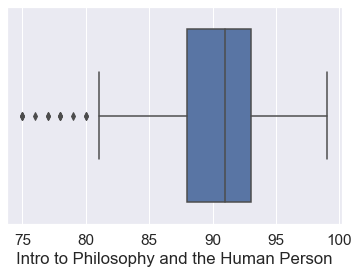

In [69]:
subject = 'Intro to Philosophy and the Human Person' #subjarr[0].name
rawscore = 'raw1'
scatterdf = df[[subject, 'raw1', 'raw2', 'raw3', 'raw4', 'raw5']]
#scatterdf[subject],parameters = stats.boxcox(df[i.name]) #BOXCOX
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) ## Normalization
# d = scaler.fit_transform(scatterdf[subject].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=[subject])
# scatterdf[subject] = tempFrame[subject] ##

# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) ## Normalization
# d = scaler.fit_transform(scatterdf['raw1'].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=['raw1'])
# scatterdf['raw1'] = tempFrame['raw1'] ##

scatterdf[subject] = scatterdf[subject]
scatterdf = scatterdf.dropna()
print(scatterdf)
sns.boxplot(data=scatterdf,x=scatterdf[subject])

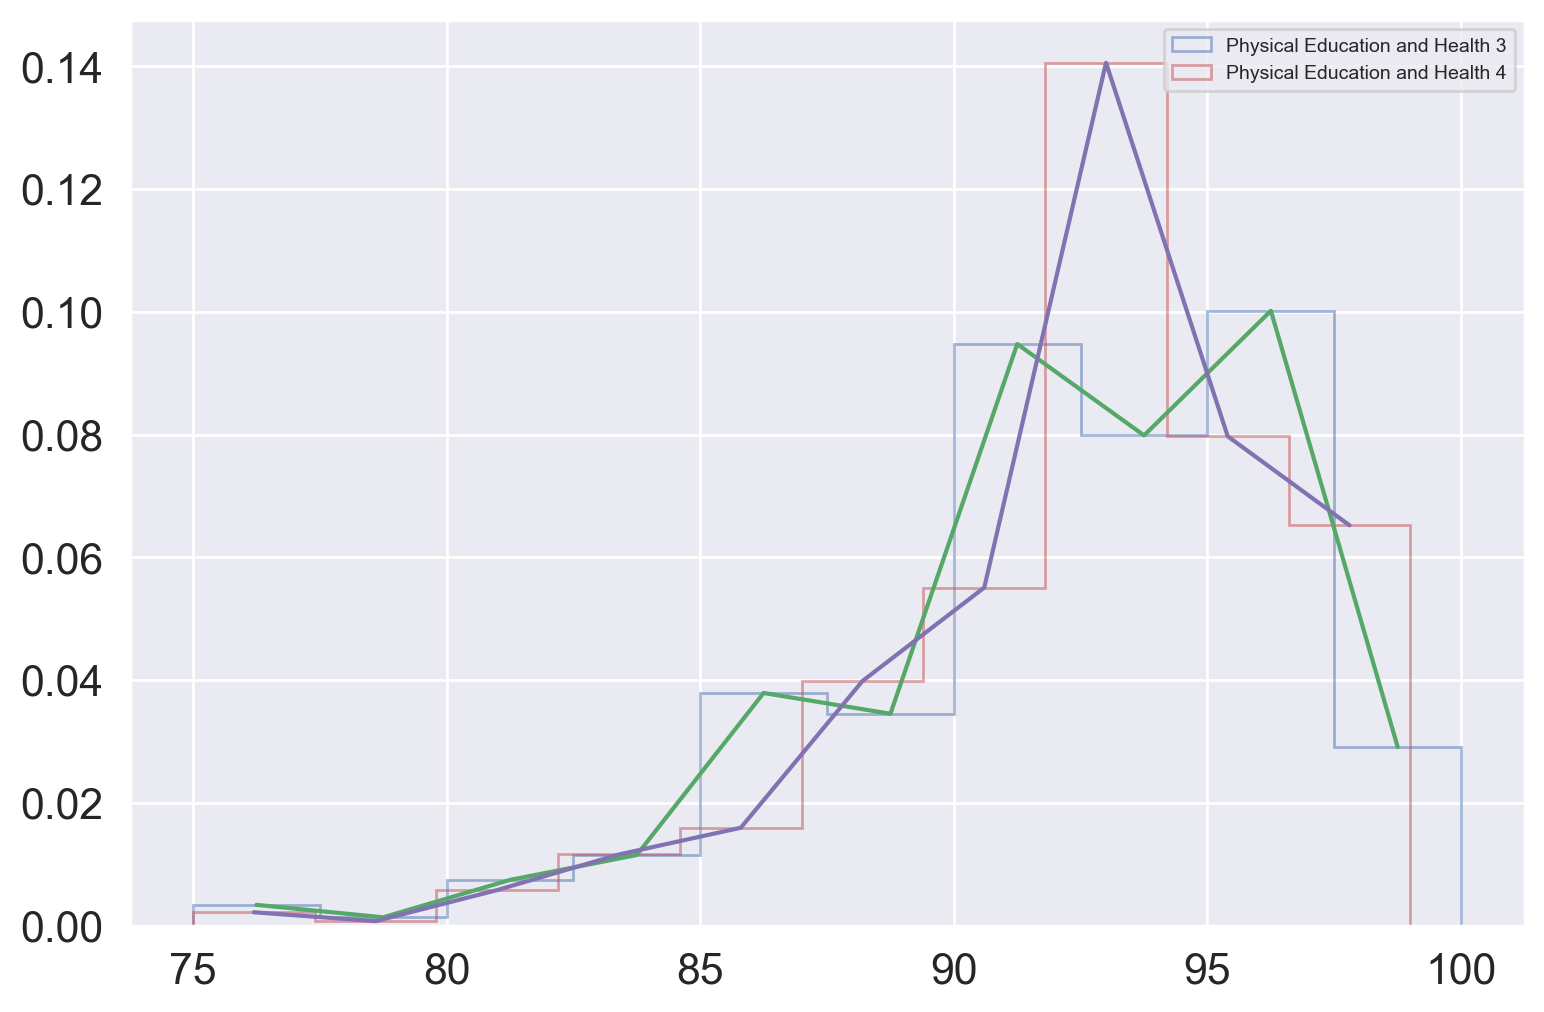

In [98]:
#from astropy.visualization import hist
#hist(subject1,density=True,bins='scott')
#plt.style.use('seaborn-deep')
plt.figure(figsize=(9,6),dpi=200)
limit = 2 #Change Variable for number subjects 
check = 1
for i in subjarr:
    #kde = stats.gaussian_kde(i.dropna())
    n,x,_ = plt.hist(i,density=True, label=i.name,histtype=u'step', alpha = 0.5)
    #xx = np.linspace(65,105,40)
    #plt.plot(kde(xx), label=i.name)
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.plot(bin_centers,n)
    if check == limit:
        break
    else:
        check = check + 1
plt.legend(prop={'size':7})
plt.show()


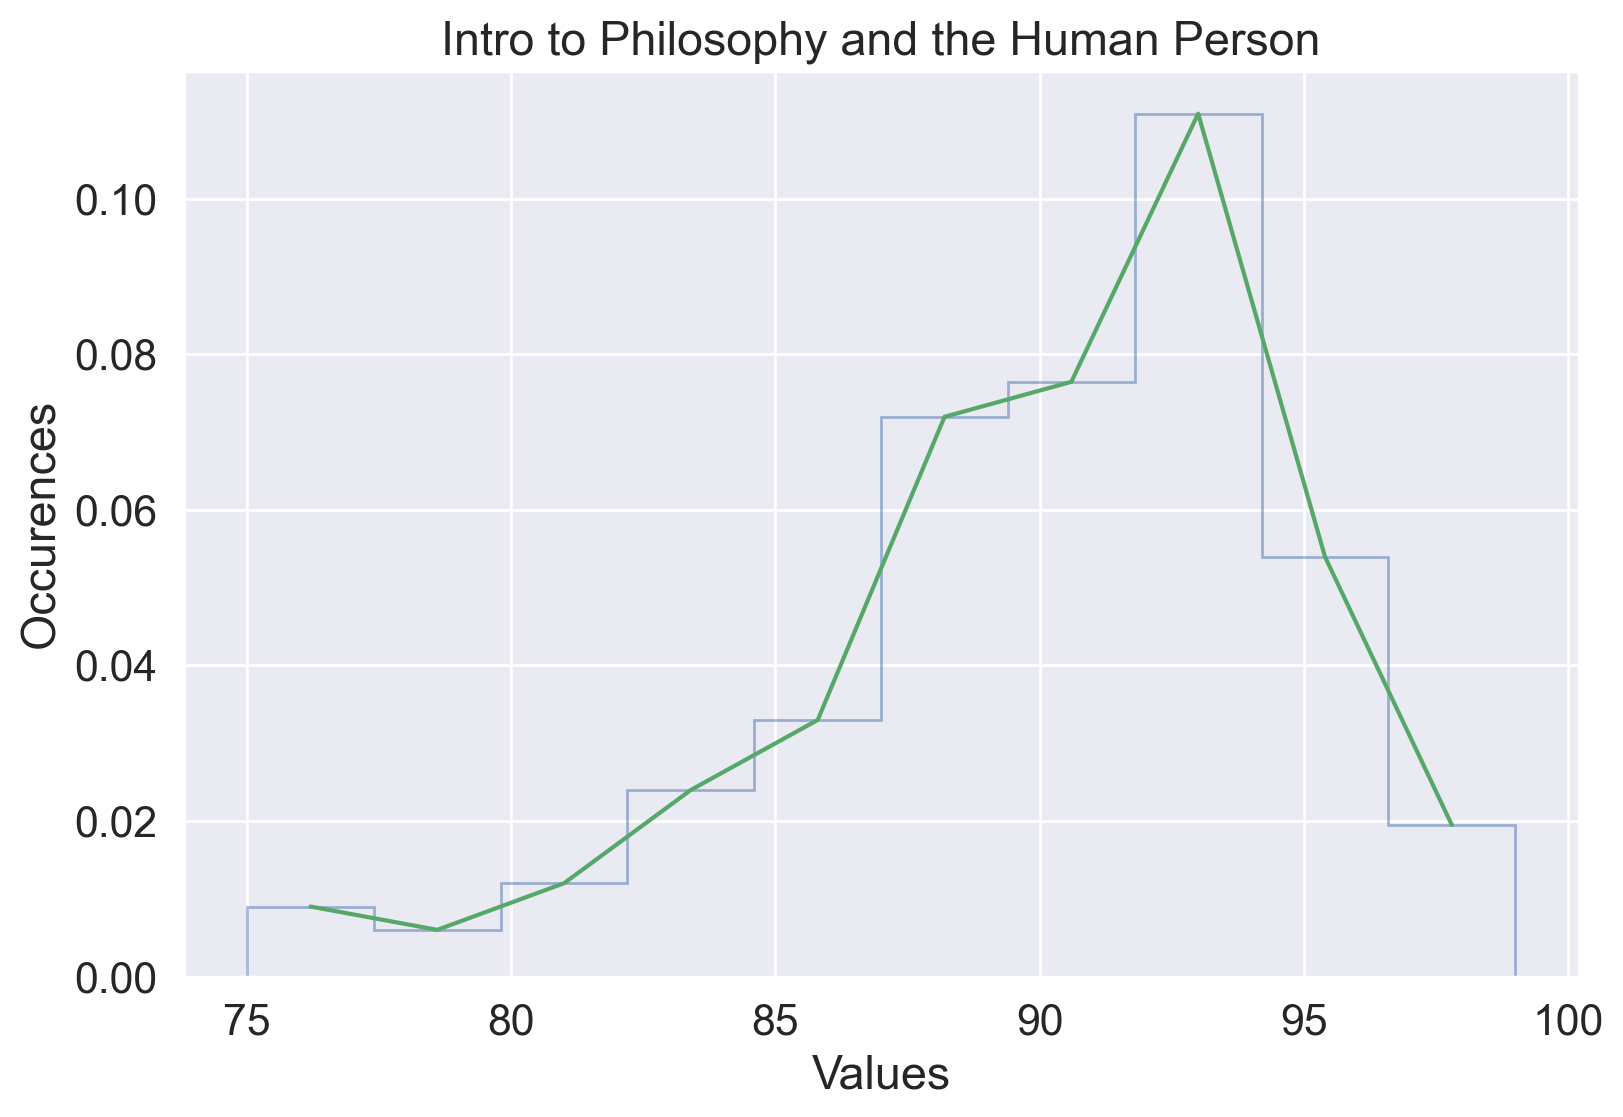

In [113]:
plt.figure(figsize=(9,6),dpi=200)
n,x,_ = plt.hist(df[subject],density=True,label=subject,histtype=u'step', alpha = 0.5)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
plt.title(label='Intro to Philosophy and the Human Person')
plt.ylabel('Occurences')
plt.xlabel('Values')
plt.show()

In [70]:
# Check Outlier Data Using IQR
Q1=scatterdf[subject].quantile(0.25)
Q3=scatterdf[subject].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
#print(Lower_Whisker)
#print(Upper_Whisker)
# Drop Outlier Data
scatterdf = scatterdf[scatterdf[subject] > Lower_Whisker]
scatterdf = scatterdf[scatterdf[subject] < Upper_Whisker]
scatterdf

Intro to Philosophy and the Human Person  raw1  raw2  raw3  raw4  raw5
1                                        86.0    44    21    24    16    14
5                                        91.0    51    23    23    16    17
8                                        92.0    48    26    27    17    12
9                                        85.0    58    20    17    15    12
13                                       90.0    52    25    16    20    16
..                                        ...   ...   ...   ...   ...   ...
204                                      87.0    54    21    25    18    17
207                                      91.0    70    27    24    25    23
208                                      92.0    58    24    25    15    18
209                                      99.0    68    24    25    22    17
211                                      95.0    75    31    30    34    16

[266 rows x 6 columns]

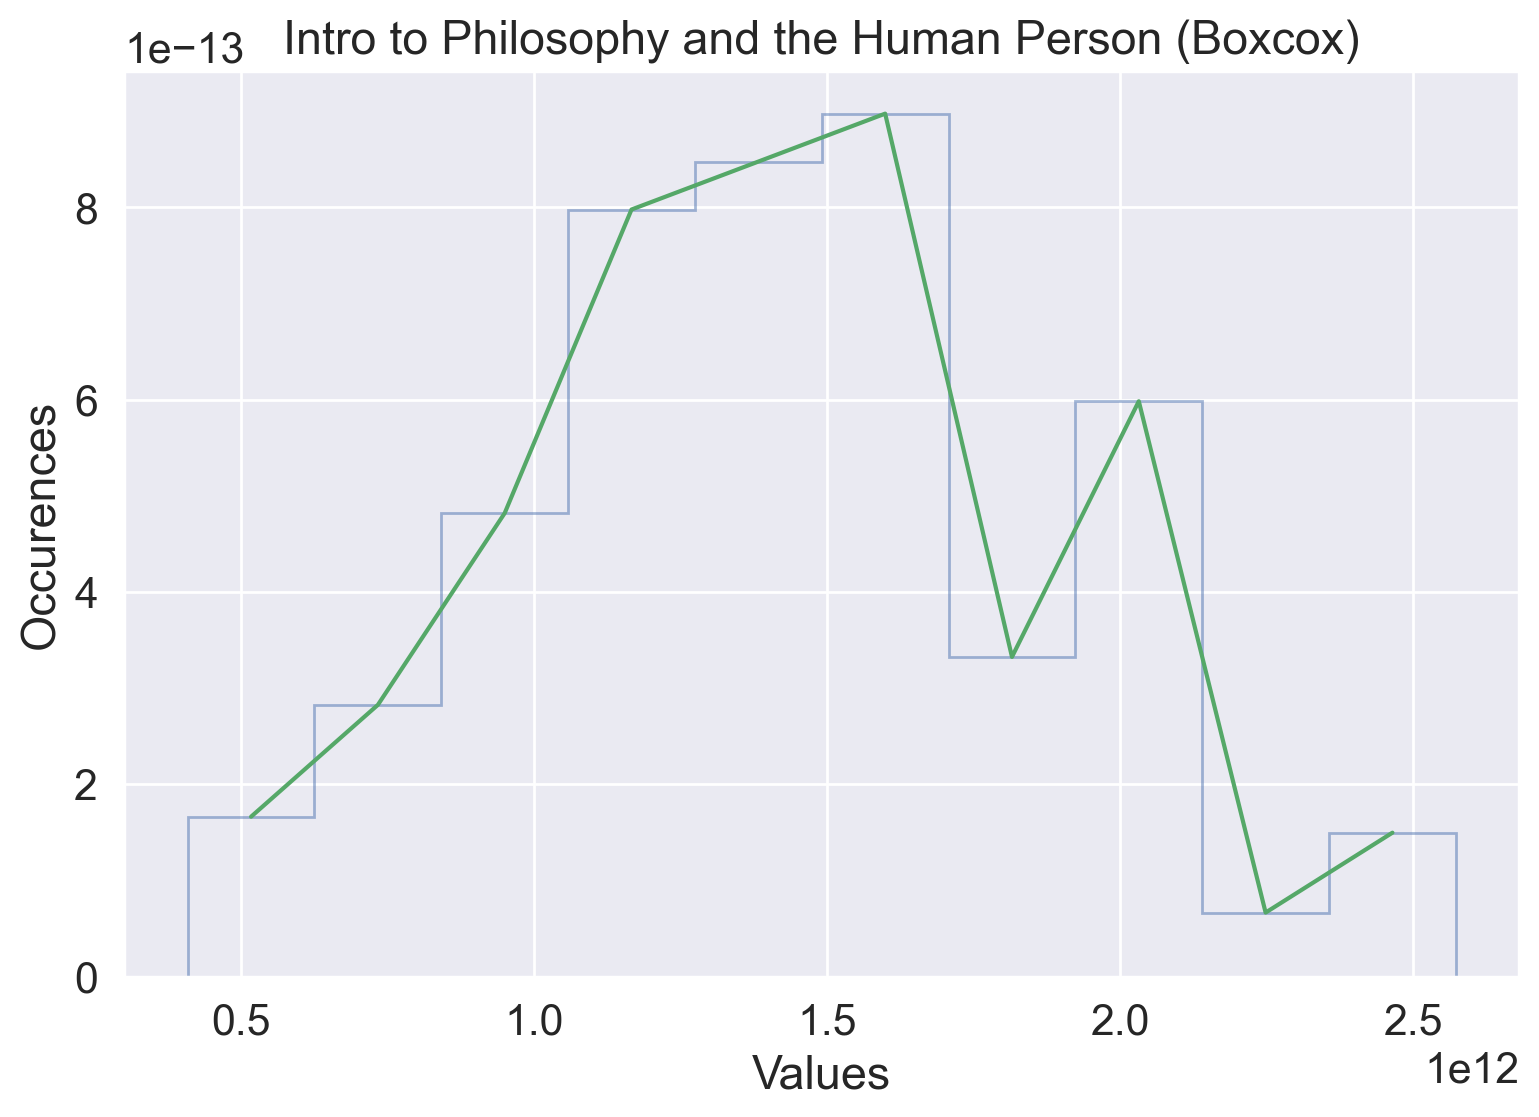

1      1.011603e+12
5      1.471432e+12
8      1.582017e+12
9      9.361180e+11
13     1.367482e+12
           ...     
204    1.092195e+12
207    1.471432e+12
208    1.582017e+12
209    2.572603e+12
211    1.957092e+12
Name: Intro to Philosophy and the Human Person, Length: 278, dtype: float64

In [111]:
plt.figure(figsize=(9,6),dpi=200)
temp_df = df.loc[:, [subject]].dropna()
temp_df[subject], parameters = stats.boxcox(temp_df[subject]) #Boxcox
n,x,_ = plt.hist(temp_df[subject],density=True,label=subject,histtype=u'step', alpha = 0.5)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
plt.ylabel('Occurences')
plt.xlabel('Values')
plt.title(label='Intro to Philosophy and the Human Person (Boxcox)')
plt.show()
temp_df[subject]

In [114]:
#Pearsons Correlation Coefficient
pearsondf = scatterdf[[subject, 'raw1', 'raw2', 'raw3', 'raw4', 'raw5']].dropna()
pearsondf = pearsondf[pearsondf[subject] > Lower_Whisker]
pearsondf = pearsondf[pearsondf[subject] < Upper_Whisker]
rho_pearson = []
print(subject)
for i in range(5):
    rho_pearson.append(np.corrcoef(pearsondf[subject],pearsondf['raw'+str(i+1)]))
print('Pearson: ')
for i in rho_pearson:
    print(i)

#Spearman Correlation + Pvalue
rho_spearman = []
for i in range(5):
    rho_spearman.append(spearmanr(pearsondf[subject],pearsondf['raw'+str(i+1)]))
print('Spearman: ')
for i in rho_spearman:
    print(i)

print(pearsondf[subject].var())

Intro to Philosophy and the Human Person
Pearson: 
[[1.         0.37280966]
 [0.37280966 1.        ]]
[[1.         0.24965869]
 [0.24965869 1.        ]]
[[1.         0.29512794]
 [0.29512794 1.        ]]
[[1.         0.26864955]
 [0.26864955 1.        ]]
[[1.        0.1778951]
 [0.1778951 1.       ]]
Spearman: 
SpearmanrResult(correlation=0.3906709399116611, pvalue=3.947715259777125e-11)
SpearmanrResult(correlation=0.29229475091383805, pvalue=1.2278624786682785e-06)
SpearmanrResult(correlation=0.3042170648258729, pvalue=4.221902704026328e-07)
SpearmanrResult(correlation=0.25525006000883665, pvalue=2.5155577046416586e-05)
SpearmanrResult(correlation=0.18606156661833428, pvalue=0.0023119057872929877)
16.0419492126543


<bound method Figure.show of <Figure size 1800x1200 with 6 Axes>>

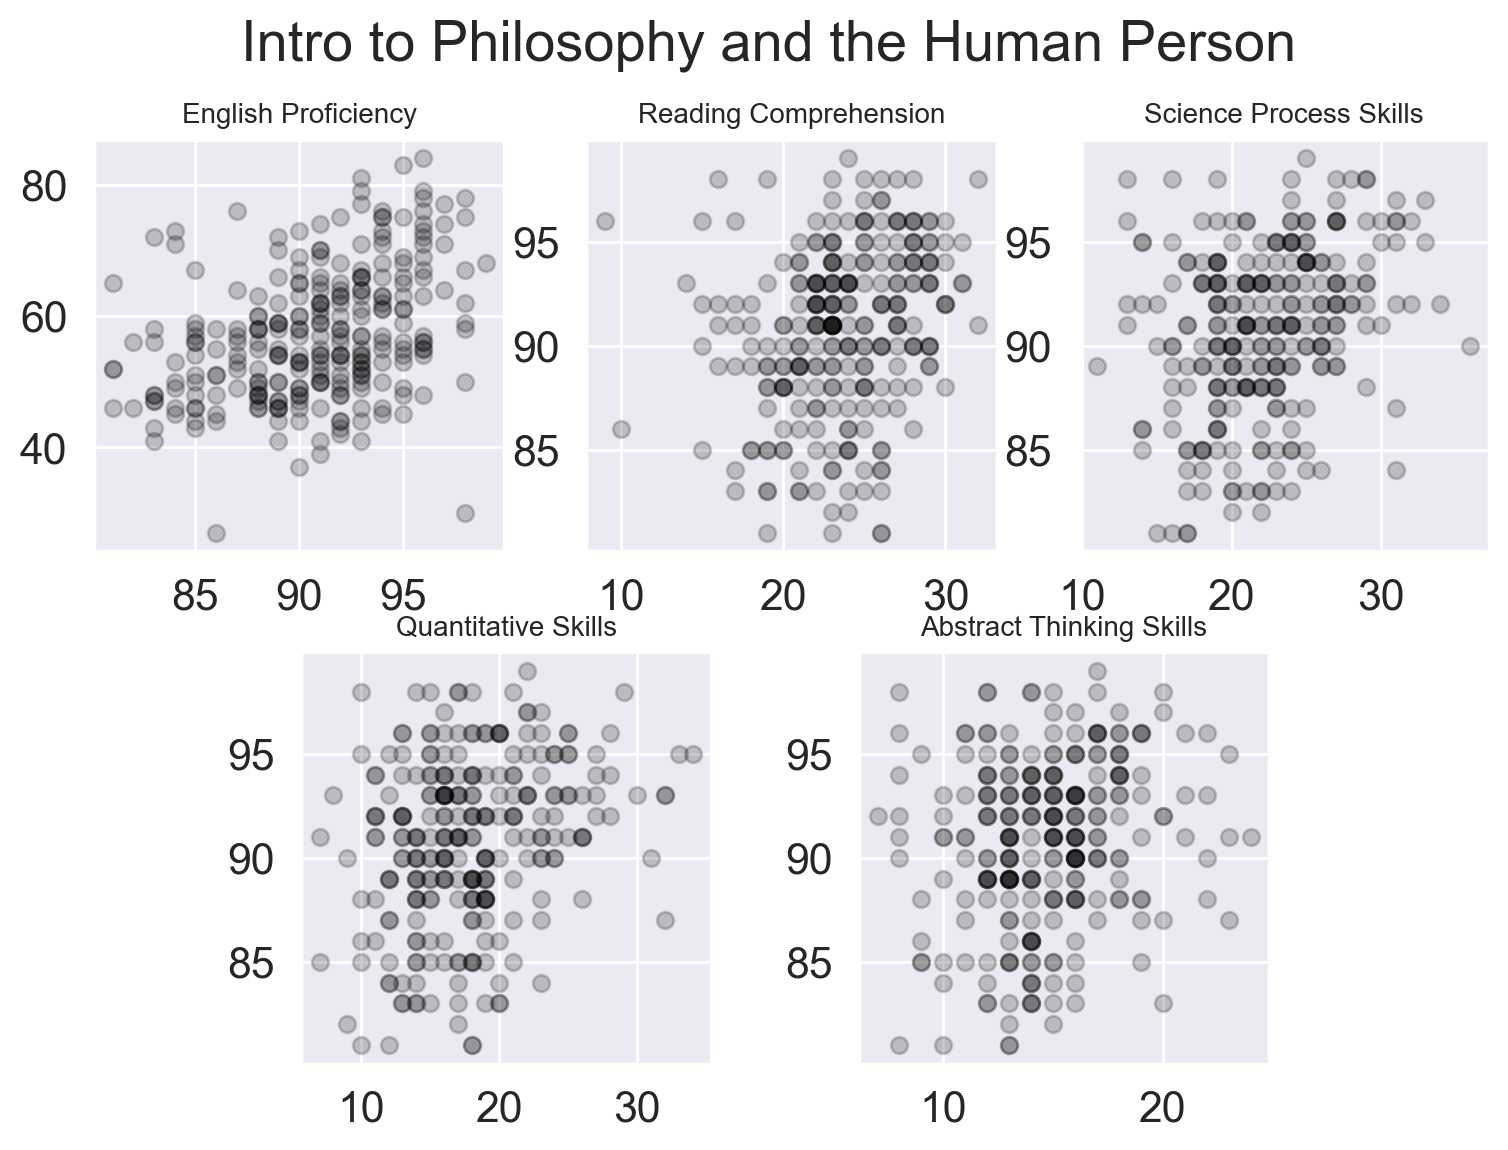

In [73]:
#ScatterPlot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(9,6),dpi=200)
ax6.set_visible(False)
fig.suptitle(subject)
ax4.set_position([0.24,0.110,0.228,0.343])
ax5.set_position([0.55,0.110,0.228,0.343])
ax1.scatter(scatterdf[subject],scatterdf['raw1'], color='black', alpha=0.2)
ax1.set_title('English Proficiency',fontdict={'fontsize':10,})
ax2.scatter(scatterdf['raw2'],scatterdf[subject], color='black', alpha=0.2)
ax2.set_title('Reading Comprehension',fontdict={'fontsize':10,})
ax3.scatter(scatterdf['raw3'],scatterdf[subject], color='black', alpha=0.2)
ax3.set_title('Science Process Skills',fontdict={'fontsize':10,})
ax4.scatter(scatterdf['raw4'],scatterdf[subject], color='black', alpha=0.2)
ax4.set_title('Quantitative Skills',fontdict={'fontsize':10,})
ax5.scatter(scatterdf['raw5'],scatterdf[subject], color='black', alpha=0.2)
ax5.set_title('Abstract Thinking Skills',fontdict={'fontsize':10,})
plt.xlabel('Grade')
plt.ylabel('Raw Score')
plt.title(label=subject)
fig.show

In [22]:
X_num = df.drop(columns=['appno','name','schname','codename','date_exam'])
rawlist = ['raw1', 'raw2', 'raw3', 'raw4', 'raw5']
y1 = df['raw1']
y2 = df['raw2']
y3 = df['raw3']
y4 = df['raw4']
y5 = df['raw5']
X_num = df.drop(columns=[col for col in df if col not in (nullrange['Subjects'].tolist())])
X_num

21st Century Literature from the Philippines and the World  \
0                                                  NaN            
1                                                  NaN            
2                                                 89.0            
3                                                 92.0            
4                                                 93.0            
..                                                 ...            
207                                               94.0            
208                                                NaN            
209                                                NaN            
210                                               88.0            
211                                                NaN            

     Disaster Readiness and Risk Reduction  Empowerment Technologies  \
0                                      NaN                      91.0   
1                                      NaN                      84.0   
2                                     95.0                       NaN   
3                                     94.0                       NaN   
4                                      NaN                       NaN   
..                                     ...                       ...   
207                                   93.0                       NaN   
208                                   98.0                       NaN   
209                                    NaN                       NaN   
210                                    NaN                       NaN   
211                                   93.0                       NaN   

     English for Academic and Professional Purposes  Entrepreneurship  \
0                                               NaN              83.0   
1                                               NaN              80.0   
2                                               NaN              85.0   
3                                               NaN              90.0   
4                                              97.0              98.0   
..                                              ...               ...   
207                                            94.0              87.0   
208                                            89.0               NaN   
209                                            91.0               NaN   
210                                            85.0              95.0   
211                                            95.0               NaN   

     Filipino Sa Piling Larang-Akademik  General Biology 2  \
0                                   NaN                NaN   
1                                  88.0                NaN   
2                                  95.0               95.0   
3                                  88.0               90.0   
4                                  93.0               90.0   
..                                  ...                ...   
207                                91.0                NaN   
208                                94.0                NaN   
209                                98.0               90.0   
210                                91.0                NaN   
211                                97.0               96.0   

     General Chemistry 2  General Physics 1  General Physics 2  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                   85.0               91.0               90.0   
3                    NaN               84.0               87.0   
4                   89.0               88.0               91.0   
..                   ...                ...                ...   
207                 91.0               90.0               92.0   
208                  NaN               91.0               90.0   
209                  NaN               89.0               90.0   
210                 88.0               91.0          

In [23]:
num_cols = list(X_num.columns)
corr_matrix = X_num.corr(method='spearman')
#sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
#plt.show

In [24]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j])

In [67]:
X_y = X_num.copy()

column_names = ['raw1','raw2', 'raw3', 'raw4', 'raw5']
X_y['Total Raw Score'] = df[column_names].sum(axis=1)
X_y_corr_matrix = X_y.corr(method='pearson')
corr_target = X_y_corr_matrix[['Total Raw Score']].drop(labels=['Total Raw Score'])

X_y['Abstract'] = y5
X_y_corr_matrix = X_y.corr(method='spearman')
corr_target = pd.concat([X_y_corr_matrix[['Abstract']].drop(labels=['Total Raw Score','Abstract']),corr_target],axis=1)
corr_target
X_y['Quantitative'] = y4
X_y_corr_matrix = X_y.corr(method='spearman')
corr_target = pd.concat([X_y_corr_matrix[['Quantitative']].drop(labels=['Total Raw Score','Quantitative','Abstract']),corr_target],axis=1)
X_y['Scientific'] = y3
X_y_corr_matrix = X_y.corr(method='spearman')
corr_target = pd.concat([X_y_corr_matrix[['Scientific']].drop(labels=['Total Raw Score','Scientific','Quantitative','Abstract']),corr_target],axis=1)
X_y['Reading'] = y2
X_y_corr_matrix = X_y.corr(method='spearman')
corr_target = pd.concat([X_y_corr_matrix[['Reading']].drop(labels=['Total Raw Score','Reading','Scientific','Quantitative','Abstract']),corr_target],axis=1)

X_y['English'] = y1
X_y_corr_matrix = X_y.corr(method='spearman')
corr_target = pd.concat([X_y_corr_matrix[['English']].drop(labels=['Total Raw Score','English','Reading','Scientific','Quantitative','Abstract']),corr_target],axis=1)

yticklabels = []
temp_transposed = nulls_transposed
temp_subject = temp_transposed.loc[temp_transposed['Subjects'] == 'Contemporary Arts']
temp_transposed = temp_transposed.loc[temp_transposed['Subjects'] != 'Contemporary Arts']
temp_transposed
temp_transposed.sort_values('Subjects',inplace=True)
temp_transposed = temp_transposed.append(temp_subject)
temp_subject = temp_transposed.loc[temp_transposed['Subjects'] == 'Inquiries, Investigation, & Immersion']
temp_transposed.loc[temp_transposed['Subjects'] == 'Inquiries, Investigation, & Immersion'] = temp_transposed.loc[temp_transposed['Subjects'] == 'Intro to Philosophy and the Human Person']
temp_transposed.loc[temp_transposed['Subjects'] == 'Intro to Philosophy and the Human Person'] = temp_subject
for subject, no in zip(temp_transposed['Subjects'].loc[temp_transposed['No of Entries'] > 200],nulls_transposed['No of Entries'].loc[nulls_transposed['No of Entries'] > 200]):
    yticklabels.append(subject + ' : ' + str(no))

corr_target = corr_target.round(3)
plt.figure(figsize=(9,6),dpi=1200)
sns.heatmap(corr_target, annot=True, fmt='1', cmap='RdBu_r')
plt.show

<ipython-input-67-944907f31cb2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_transposed.sort_values('Subjects',inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

In [26]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_df = X_num[['21st Century Literature from the Philippines and the World']]
mutual_info_df['score'] = y1
mutual_info_df = mutual_info_df.dropna()
rho_mutual_info = mutual_info_regression(mutual_info_df[['21st Century Literature from the Philippines and the World']], mutual_info_df['score'])
rho_mutual_info

<ipython-input-26-3bcd2fd8f195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_info_df['score'] = y1


array([0.04116004])